# Predictions on different data quality

## Parameters and model

In [1]:
import sys
sys.path.append('..')

from util.graphs import plot_series
from timeseries.timeseries import StockMarketSeries
from timeseries.utils import SeriesColumn, DeviationSource
from predictions.model import PredictionModel

company_name = "Intel"
time_series_start = "2017-01-03"
time_series_values = 300
column = SeriesColumn.CLOSE
stock = StockMarketSeries(company_name, time_series_start, time_series_values,
                           weights={SeriesColumn.OPEN: 0.2,
                                    SeriesColumn.CLOSE: 0.2,
                                    SeriesColumn.ADJ_CLOSE: 0.25,
                                    SeriesColumn.HIGH: 0.15,
                                    SeriesColumn.LOW: 0.15,
                                    SeriesColumn.VOLUME: 0.05})

## Data - one price column

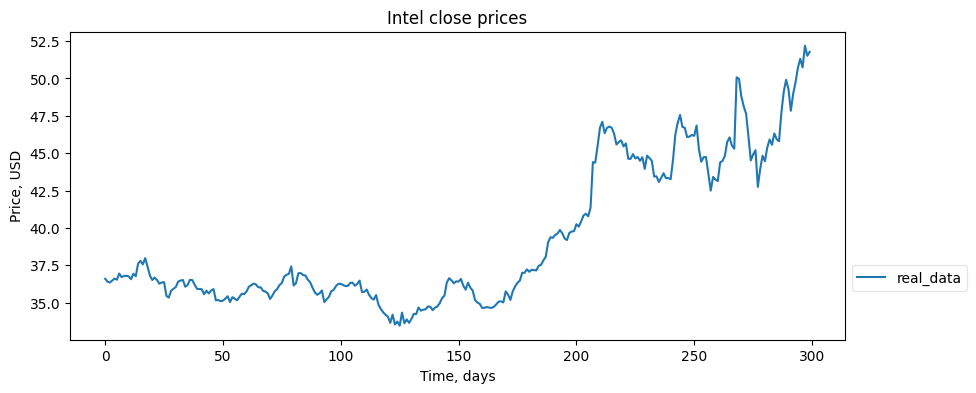

In [2]:
plot_series(stock, "close prices", real_data=stock.real_series[SeriesColumn.CLOSE])

## Predictions parameters

In [3]:
prediction_start = 260
iterations = 5

model = PredictionModel(stock, prediction_start, column, iterations=iterations)

## Statistical methods

In [4]:
from arima import ManualArima, AutoArima

arima_type = AutoArima

## AR(5)

In [5]:
arima = model.configure_model(arima_type, p=5, q=0)

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=329.117, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=327.543, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=328.183, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.331, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=326.376, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.325, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.126 seconds


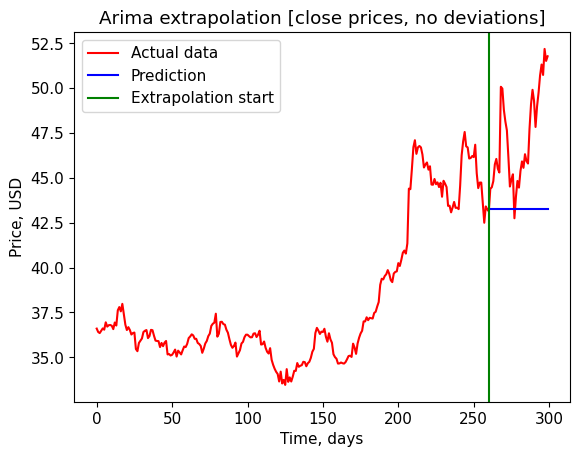

In [6]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [7]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=329.117, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=327.543, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=328.183, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.331, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=326.376, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.325, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.149 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=329.117, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=327.543, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=328.183, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.331, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=326.376, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.325, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit 

KeyboardInterrupt: 

## ARIMA(5,1,5)

In [8]:
arima = model.configure_model(arima_type, p=5, q=2)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=321.105, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=327.543, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=328.183, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.331, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=326.376, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=328.753, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=328.866, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=325.411, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=331.123, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.325, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.474, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=329.823, Time=0.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fi

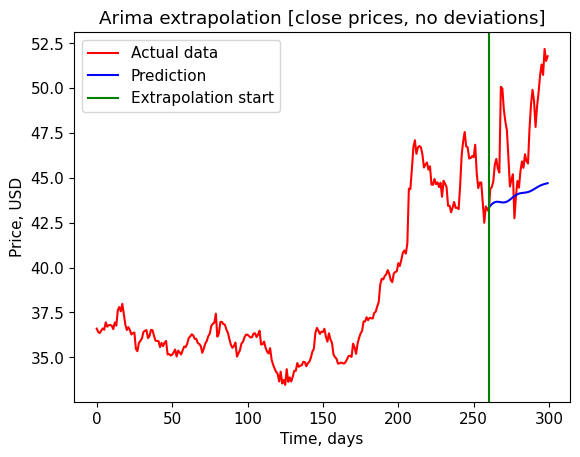

In [9]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [10]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=321.105, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=327.543, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=328.183, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=328.331, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=326.376, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=328.753, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=328.866, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=325.411, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=331.123, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=327.325, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=329.474, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=329.823, Time=0.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fi

KeyboardInterrupt: 

## XGBoost

In [11]:
from ml import XGBoost

xgboost = model.configure_model(XGBoost, optimize=False)

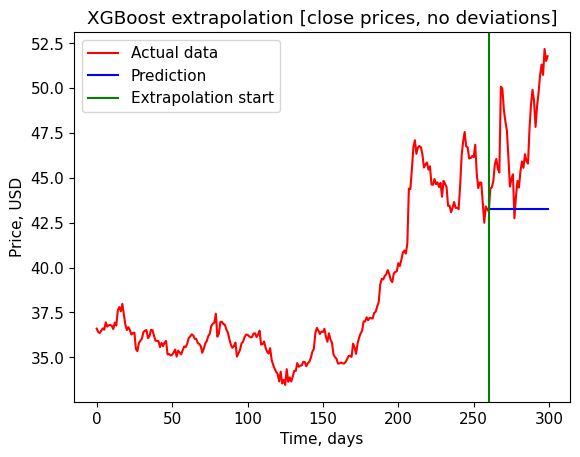

In [12]:
xgboost.plot_prediction(source=DeviationSource.NONE)

In [13]:
%%capture --no-stdout --no-display
xgboost.compute_statistics_set()

Statistics [Intel stock, close price, 5 iterations]

   Deviation Scale Mitigation Time [ms] Time SD M. time  RMSE   MAE   MAPE MAPE SD
0          -     -          N     78.43   15.72     0.0  4.71  3.96   8.12     0.0
1          N     S          N     59.61    6.93     0.0  4.84  4.09    8.4     0.0
2          N     S          Y     50.23    7.08   25.63  4.24  3.43    7.0     0.0
3          N     M          N     60.65    5.66     0.0  3.99  3.15   6.43     0.0
4          N     M          Y     50.25    8.32   31.21   4.0  3.16   6.45     0.0
5          N     H          N      54.7    7.67     0.0  5.45  4.79   9.88     0.0
6          N     H          Y     53.35    8.52   18.62   4.8  4.05   8.31     0.0
7          I     S          N     57.58   13.39     0.0  4.22  3.41   7.06     0.0
8          I     S          Y     68.98    3.84    0.27  4.71  3.95   8.11     0.0
9          I     M          N     62.83   10.88     0.0  3.69  2.82   5.88     0.0
10         I     M          Y     

## Reservoir computing

In [14]:
from predictions.ml import Reservoir

reservoir = model.configure_model(Reservoir)

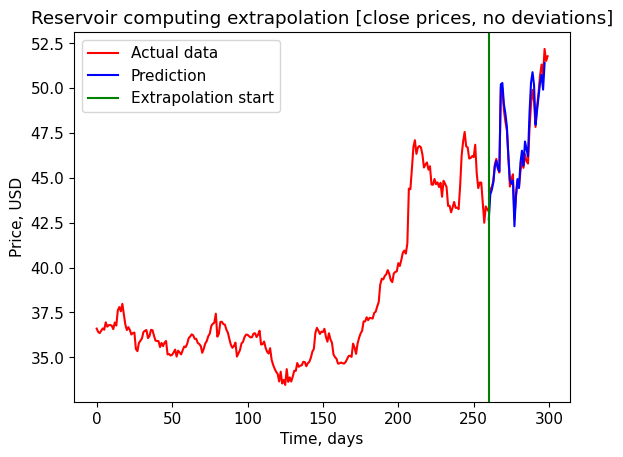

In [15]:
reservoir.plot_prediction(source=DeviationSource.NONE)

In [16]:
%%capture --no-stdout --no-display
reservoir.compute_statistics_set()

Statistics [Intel stock, close price, 5 iterations]

   Deviation Scale Mitigation Time [ms] Time SD M. time  RMSE   MAE  MAPE MAPE SD
0          -     -          N     25.08    8.63     0.0  0.36  0.29  0.63    0.19
1          N     S          N      26.0    5.64     0.0  0.54  0.43  0.91    0.41
2          N     S          Y     21.95    8.66   25.63  0.79  0.63  1.34    0.28
3          N     M          N     25.13    8.26     0.0  1.17  0.93   2.0    0.71
4          N     M          Y     25.08    6.55   31.21  0.57  0.44  0.94    0.33
5          N     H          N     26.18    9.87     0.0   1.8  1.47  3.12    0.88
6          N     H          Y     24.05    6.16   18.62  0.57  0.42  0.91    0.25
7          I     S          N     25.08    9.42     0.0  0.33  0.26  0.57    0.18
8          I     S          Y     25.08   10.25    0.27  0.48  0.39  0.85    0.31
9          I     M          N     25.08    8.63     0.0  0.36  0.28  0.62    0.34
10         I     M          Y     25.15    9.